# Module 5 Assessment 

Welcome to your Module 5 Assessment. You will be tested for your understanding of concepts and ability to programmatically solve problems that have been covered in class and in the curriculum. 

**_Read the instructions very carefully!_** You will be asked both to write code and respond to a few short answer questions.  

The goal here is to demonstrate your knowledge. Showing that you know things about certain concepts and how to apply different methods is more important than getting the best model.

You will have up to 120 minutes to complete this assessment.

The sections of the assessment are:

- Decision Trees
- Ensemble Models 
- PCA
- Clustering

**Note on the short answer questions**: 
> Please use your own words, even if you consult another source to help you craft your response. Short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, but do your best to communicate your answers clearly!


## Decision Trees

### Concepts 
You're given a dataset of 30 elements, 15 of which belong to a positive class (denoted by **+**) and 15 of which do not (denoted by __-__). These elements are described by two attributes, A and B, that can each have either one of two values, true or false. 

The diagrams below show the result of splitting the dataset by attribute: the diagram on the left hand side shows the class distribution of elements obtained when splitting the data by attribute A, and the diagram of the right hand side shows the class distribution of elements obtained when splitting the data by attribute B. 

<img src="images/decision_stump.png">

**1.1) Which one of the two attributes resulted in the best split of the original data? How do you select the best attribute to split a tree at each node?** _(Hint: Mention splitting criteria)_

Attribute A resulted in the best split, because that attribute explains most of your data. The goal is to get as
close to a pure split. The entropy is low and the information gain to the next split will be high. For example, in
next interior node for A, the modle just has to split between 2 observations as 13 have already been 'explained'.
This means that there is high information gain betwen the fiorast split and the next split. In split B there is a
lot unexplained information by the split, meaning that there will most likely need to be more nodes to better
classify the data - this means larger entropy and smaller information gain between splits.

### Decision Trees for Regression 

In this section, you will use decision trees to fit a regression model to the Combined Cycle Power Plant dataset. 

This dataset is from the UCI ML Dataset Repository, and has been included in the `data` folder of this repository as an Excel `.xlsx` file, `Folds5x2_pp.xlsx`. 

The features of this dataset consist of hourly average ambient variables taken from various sensors located around a power plant that record the ambient variables every second.  
- Temperature (AT) 
- Ambient Pressure (AP) 
- Relative Humidity (RH)
- Exhaust Vacuum (V) 

The target to predict is the net hourly electrical energy output (PE). 

The features and target variables are not normalized.

In the cells below, we import `pandas` and `numpy` for you, and we load the data into a pandas DataFrame. We also include code to inspect the first five rows and get the shape of the DataFrame.

In [153]:
import pandas as pd
import numpy as np

# Load the data
filename = 'data/Folds5x2_pp.xlsx'
df = pd.read_excel(filename)

In [154]:
# Inspect the first five rows of the dataframe
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [155]:
# Get the shape of the dataframe
df.shape

(9568, 5)

Before fitting any models, you need to create training and testing splits for the data.

Below, we split the data into features and target ('PE') for you. 

In [156]:
X = df[df.columns.difference(['PE'])]
y = df['PE']

**1.2) Split the data into training and test sets. Create training and test sets with `test_size=0.5` and `random_state=1`.** 

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [158]:
# Your code here. Replace None with appropriate code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**1.3) Fit a vanilla decision tree regression model with scikit-learn to the training data.** Set `random_state=1` for reproducibility. **Evaluate the model on the test data.** 

In [159]:
ss = StandardScaler()

In [160]:
X_train_ss = ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [161]:
regressor = DecisionTreeRegressor(random_state=1)  
regressor.fit(X_train_ss, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [162]:
y_pred = regressor.predict(X_test_ss)

**1.4) Obtain the mean squared error, mean absolute error, and coefficient of determination (r2 score) of the predictions on the test set.** _Hint: Look at the `sklearn.metrics` module._

In [164]:
# Your code here. Replace None with appropriate code.

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 20.315382863113904
Mean Absolute Error: 3.120438871473354
R-squared: 0.9322347357079616


Hint: MSE = 22.21041691053512

## Ensemble Methods

### Introduction to Ensemble Methods

**2.1) Explain how the random forest algorithm works. Why are random forests resilient to overfitting?**

_Hint: Your answer should discuss bagging and the subspace sampling method._

Random forests run off the idea of decision trees, except there are many running at the same time on different samples of your data (with replacement). Typically your data is split into thirds with two thirds being sampled and trained on a tree (bagging) and then internally tested the last third. The random forest then uses a subspace sampling method, which random selects only certain features as predictors in different trees, adding more variability between trees. The diversity amongst the trees is what makes a random forest resilient to overfitting.

### Random Forests and Hyperparameter Tuning using GridSearchCV

In this section, you will perform hyperparameter tuning for a Random Forest classifier using GridSearchCV. You will use `scikit-learn`'s wine dataset to classify wines into one of three different classes. 

After finding the best estimator, you will interpret the best model's feature importances. 

In the cells below, we have loaded the relevant imports and the wine data for you. 

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_wine

# Load the data
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'target'
df = pd.concat([X, y.to_frame()], axis=1)

In the cells below, we inspect the first five rows of the dataframe and compute the dataframe's shape.

In [166]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [167]:
df.shape

(178, 14)

We also get descriptive statistics for the dataset features, and obtain the distribution of classes in the dataset. 

In [168]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [169]:
y.value_counts().sort_index()

0    59
1    71
2    48
Name: target, dtype: int64

You will now perform hyper-parameter tuning for a Random Forest classifier.

**2.2) Construct a `param_grid` dictionary to pass to `GridSearchCV` when instantiating the object. Choose at least 3 hyper-parameters to tune and 3 values for each.** 

In [170]:
# Replace None with relevant code 
param_grid = {
    'criterion': ['gini'],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

Now that you have created the `param_grid` dictionary of hyperparameters, let's continue performing hyperparameter optimization of a Random Forest Classifier. 

In the cell below, we include the relevant imports for you.

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**2.3) Create an instance of a Random Forest classifier estimator; call it `rfc`.** Make sure to set `random_state=42` for reproducibility. 

In [172]:
# Replace None with appropriate code
rfc = RandomForestClassifier(random_state=42)

**2.4) Create an instance of an `GridSearchCV` object and fit it to the data.** Call the instance `cv_rfc`. 

* Use the random forest classification estimator you instantiated in the cell above, the parameter grid dictionary constructed, and make sure to perform 5-fold cross validation. 
* The fitting process should take 10 - 15 seconds to complete. 

In [173]:
# Replace None with appropriate code 
cv_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)

cv_rfc.fit(X, y)

/Users/stuartmurphy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/stuartmurphy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/stuartmurphy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/stuartmurphy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/stuartmur

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

**2.5) What are the best training parameters found by GridSearchCV?** 

_Hint: Explore the documentation for GridSearchCV._ 

In [174]:
# Replace None with appropriate code 
cv_rfc.best_params_ 

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In the cell below, we create a variable `best_model` that holds the best model found by the grid search.

In [175]:
best_model = cv_rfc.best_estimator_

Next, we give you a function that creates a horizontal bar plot to visualize the feature importances of a model, sorted in descending order. 

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline


def create_plot_of_feature_importances(model, X):
    ''' 
    Inputs: 

    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''

    feat_importances = model.feature_importances_

    features_and_importances = zip(X.columns, feat_importances)
    features_and_importances = sorted(features_and_importances,
                                      key=lambda x: x[1], reverse=True)

    features = [i[0] for i in features_and_importances]
    importances = [i[1] for i in features_and_importances]

    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.gca().invert_yaxis()
    plt.title('Feature Importances')
    plt.xlabel('importance')

**2.6) Create a plot of the best model's feature importances. What are this model's top 3 features in order of descending importance?** 

_Hint: To create the plot, pass the appropriate parameters to the function above._

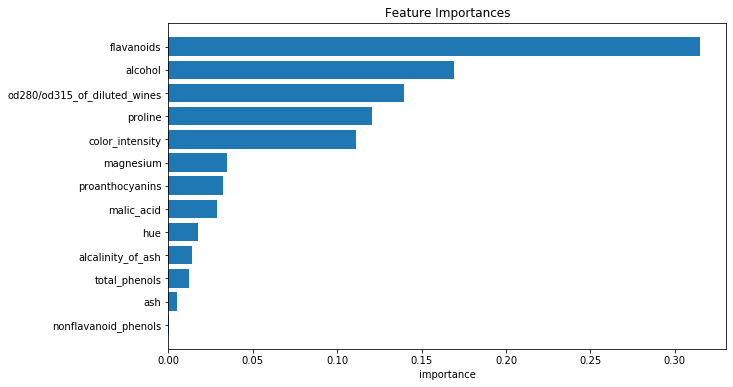

In [177]:
create_plot_of_feature_importances(best_model, X)

## Principal Components Analysis

### Training a model with PCA-extracted features

In this section, you'll apply the unsupervised learning technique of Principal Components Analysis to the wine dataset. 

You'll use the principal components of the dataset as features in a machine learning model. You'll use the extracted features to train a vanilla Random Forest Classifier, and compare model performance to a model trained without PCA-extracted features. 

In the cell below, we import the data for you, and we split the data into training and test sets. 

In [192]:
import pandas as pd
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

wine = load_wine()
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'class'
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**3.1) Fit PCA to the training data.** 

Call the PCA instance you'll create `wine_pca`. Set `n_components=0.9` and make sure to use `random_state = 42`.

_Hint: Make sure to include necessary imports for **preprocessing the data!**_

In [193]:
X_train_ss = ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [194]:
from sklearn.decomposition import PCA

In [195]:
wine_pca = PCA(n_components=0.9, random_state = 42)


In [196]:
principalComponents = wine_pca.fit_transform(X_train_ss)

**3.2) How many principal components are there in the fitted PCA object?**

_Hint: Look at the list of attributes of trained `PCA` objects in the scikit-learn documentation_

In [197]:
# Replace None with appropriate code 
print("Number of principal components:", wine_pca.components_)


Number of principal components: [[ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
   0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
   0.27507157]
 [-0.49571937 -0.21988534 -0.25579499  0.09630359 -0.26616487 -0.06381624
  -0.00971648 -0.0275335  -0.0073265  -0.54829944  0.27616688  0.15580423
  -0.39269514]
 [-0.12605367  0.08398481  0.67171617  0.58764561  0.11734551  0.15444497
   0.17404674  0.24065975  0.07724329 -0.06523068  0.08675172  0.17043147
  -0.08888266]
 [ 0.04624624  0.56428416 -0.14966332 -0.00919969 -0.52679936  0.26095189
   0.20649548  0.02063026  0.315633    0.0475105  -0.30623963  0.20186583
  -0.17851478]
 [-0.32221478  0.18146701 -0.10436437  0.13809265  0.56500632 -0.02330903
  -0.04544638 -0.5151111   0.29267105  0.01186302 -0.33361312 -0.05658015
  -0.21403151]
 [-0.12108437  0.16951285 -0.19927928 -0.17513522  0.31914517 -0.07048219
  -0.07041316  0.64832705  0.53341622 -0.02846287  0.22342025 -0.13399425
   0.

*Hint: you should end up with 8 components.*

Next, you'll reduce the dimensionality of the training data to the number of components that explain at least 90% of the variance in the data, and then you'll use this transformed data to fit a Random Forest classification model. 

You'll compare the performance of the model trained on the PCA-extracted features to the performance of a model trained using all features without feature extraction.

**3.3) Transform the training features into an array of reduced dimensionality using the `wine_pca` PCA object you've fit in the previous cell.** Call this array `X_train_pca`.

In [200]:
# Replace None with appropriate code  
X_train_pca = wine_pca.fit_transform(X_train)

Next, we create a dataframe from this array of transformed features and we inspect the first five rows of the dataframe for you. 

In [201]:
# Create a dataframe from this array of transformed features
X_train_pca = pd.DataFrame(X_train_pca)

# Inspect the first five rows of the transformed features dataset
X_train_pca.head()

,0
0,-157.493066
1,-65.581595
2,13.460491
3,142.908813
4,-447.424342


#### You will now use the PCA-extracted features to train a random forest classification model.

**3.4) Instantiate a vanilla Random Forest Classifier (call it `rfc`) and fit it to the transformed training data.** Set `random_state = 42`. 

In [202]:
# Replace None with appropriate code 
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

/Users/stuartmurphy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**3.5) Evaluate model performance on the test data and place model predictions in a variable called `y_pca_pred`.**

_Hint: Make sure to transform the test data the same way as you transformed the training data!!!_

In [203]:
X_test_ss = ss.transform(X_test)

In [204]:
# Your code here 
y_pca_pred = rfc.predict(X_test_ss)

In the cell below, we print the classification report for the model performance on the test data. 

In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pca_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.47      0.38      0.42        21
           2       0.35      0.93      0.51        14

    accuracy                           0.39        54
   macro avg       0.27      0.44      0.31        54
weighted avg       0.27      0.39      0.30        54



/Users/stuartmurphy/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Run the cell below to fit a vanilla Random Forest Classifier to the untransformed training data,  evaluate its performance on the untransformed test data, and print the classification report for the model. 

In [206]:
vanilla_rfc = RandomForestClassifier(random_state=42)
vanilla_rfc.fit(X_train, y_train)

y_pred = vanilla_rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.95      0.86      0.90        21
           2       0.93      0.93      0.93        14

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



/Users/stuartmurphy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**3.6) Compare model performance. Did the overall accuracy of the model improve when using the transformed features?**

Overall, the Accuracy of or model was greatly improved, going up from 0.39 to 0.93. Precision and Recall were also greatly improved by transforming our variables, meaning that we decreased both F1 and F2 errors.

## Clustering 

### Clustering Algorithms: k-means and hierarchical agglomerative clustering

#### 4.1) Using the gif below for reference, describe the steps of the k-means clustering algorithm.

<img src='images/good-centroid-start.gif'>

Step 1: Initialization
Randomly chooses K examples from the data as initial centroids.

Step 2: Cluster Assignment 
All the data points that are the closest (similar) to a centroid will create a cluster. We can use different measurements of distance, but Euclidean is the most common (based off of Pythagoran theory). If we’re using the Euclidean distance between data points and every centroid, a straight line is drawn between two centroids, then a perpendicular bisector (boundary line) divides this line into two clusters.

Step 3: Move the Centroid
The new value of the centroid will be the the mean of all the examples in a cluster.

Step 4: Repeat Steps 2 & 3 until stabilization.

### k-means Clustering

For this question, you will apply k-means clustering to your now friend, the wine dataset. 

You will use scikit-learn to fit k-means clustering models, and you will determine the optimal number of clusters to use by looking at silhouette scores. 

We load the wine dataset for you in the cell below. 

In [207]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
wine = load_wine()
X = pd.DataFrame(X, columns=wine.feature_names)

**4.2) Fit the k-means algorithm to the wine data for k values in the range 2 to 9 using the function given below. Obtain the silhouette scores for each trained k-means clustering model, and place the values in a list called `silhouette_scores`.** 

We have provided you with some starter code in the cell below.

_Hints: What imports do you need? Do you need to pre-process the data in any way before fitting the k-means clustering algorithm?_ 

In [208]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [209]:
from sklearn.cluster import KMeans

def get_labels(k, X):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    return kmeans.labels_

In [210]:
# Your code here

silhouette_scores = []

for k in range(2, 10):
    labels = get_labels(k, X)

    score = silhouette_score(X, labels, metric='euclidean')

    silhouette_scores.append(score)

Run the cell below to plot the silhouette scores obtained for each different value of k against k, the number of clusters we asked the algorithm to find. 

Text(0, 0.5, 'silhouette score')

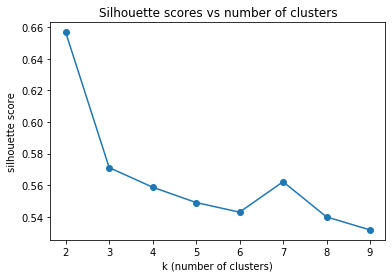

In [211]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

**4.3) Which value of k would you choose based on the plot of silhouette scores? How does this number compare to the number of classes in the wine dataset?**

Hint: this number should be <= 5.  If it's not, check your answer in the previous section.

I would chose 3 clusters as this is the elbow point in the graph. Past this point the level of inertia becomes more and more insignificent - essentially you are gaining diminishing returns as you increase K past this point. As K increases, as does the complexity of the data. It's easier to deal with less clusters with a relative;ly low silhouette score thamn iot is to deal with a lot of clusters and a lower silhouette score.

## Finished!

Please submit only your notebook, named `mod5_assessment.ipynb`, [here](https://docs.google.com/forms/d/e/1FAIpQLSfZkN5pNXXdjj1jnsqsoY9eOv2gj_Iw4fvgzSNGplQcTTw6WA/viewform?usp=sf_link).